In [1]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

In [115]:
image = cv2.imread("../data/img/coins.png")
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

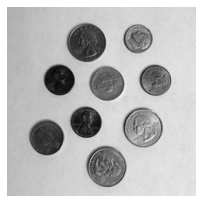

In [116]:
jimshow_channel(grey)

## Sobel operators

In [117]:
# Sobel operatator
sobelX = cv2.Sobel(grey, cv2.CV_64F, 1, 0)# vertical gradients
sobelY = cv2.Sobel(grey, cv2.CV_64F, 0, 1)# horizontal gradients

We have mainly used 8-bit unsigned integers. Why are we using a 64-bit float now?

Transitioning from black-to-white is considered a positive slope, whereas a transition from white-to-black is a negative slope. 

If you don’t use a floating point data type when computing the gradient magnitude, you will miss edges, specifically the white-to-black transitions.

In order to ensure you catch all edges, use a floating point data type, then take the absolute value of the gradient image and convert it back to an 8-bit unsigned integer.

In [118]:
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

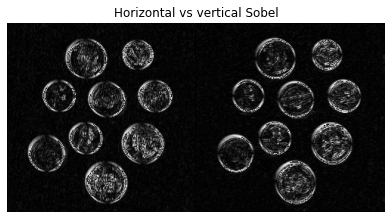

In [122]:
blurred = np.hstack([sobelX, sobelY])
jimshow_channel(blurred, "Horizontal vs vertical Sobel")

## Combined Sobel

In order to combine the gradient images in both the x and y direction, we can apply a bitwise OR. 

Remember, an OR operation is true when either pixel is greater than zero. 

Therefore, a given pixel will be ```True``` if either a horizontal or vertical edge is present.

In [109]:
sobelCombined = cv2.bitwise_or(sobelX, sobelY)

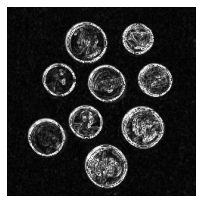

In [113]:
jimshow_channel(sobelCombined)

## Laplacian

Laplacian operator returns a single gradient, no need to perform two passes.

In [123]:
#laplacian to compute gradient magnitude
lap = cv2.Laplacian(grey, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

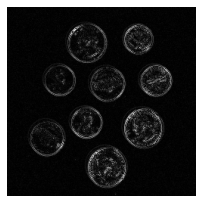

In [124]:
jimshow_channel(lap)

__Perform Canny__

In [125]:
blurred = cv2.GaussianBlur(grey, (5,5), 0)

Manually setting upper and lower bounds.

For one way to set thresholds automatically, consider this website:

https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/

In [130]:
canny = cv2.Canny(blurred, 30, 150)

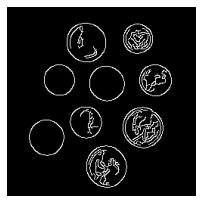

In [131]:
jimshow_channel(canny)

## Find contours

There are three arguments in cv2.findContours() function.

```cv2.findContours(image, contour_retrieval_mode, contour_approximation_method)```

And it outputs the image, contours and hierarchy. ```contours``` is a Python list of all the contours in the image. 

Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html

In [132]:
(cnts, _) = cv2.findContours(canny.copy(), 
                             cv2.RETR_EXTERNAL, 
                             cv2.CHAIN_APPROX_SIMPLE)

## Draw contours

```cv2.drawContours(image, contours, fill, colour, thickness)```

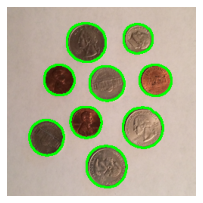

In [144]:
jimshow(cv2.drawContours(image.copy(), cnts, -1, (0, 255, 0), 2))

## Counting coins

In [137]:
print(f"I can count {len(cnts)} coins in this image!")

I can count 9 coins in this image!


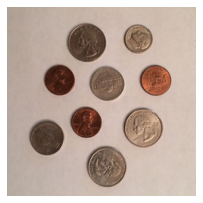

In [138]:
jimshow(image)